# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

## Inicialização

In [1]:
# Carregando todas as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

### Planos

In [3]:
#Informações gerais do Df

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos

df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Imprima uma amostra de dados dos planos

df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


 - É possível perceber que existem apenas 2 planos, o plano surf (que é mais barato mensalmente mas possui os minutos e internet mais caros) e o plano ultimate (que é mais caro mensalmente mas possui os minutos e internet mais baratos) 

#### Corrija os dados

Sem correções

#### Enriqueça os dados

Sem enriquecimento

### Usuários

In [6]:
#Informações gerais do Df

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos

df_users.describe(include = 'all')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,34
unique,NaN,458,399,NaN,73,266,2,29
top,NaN,Jasper,Wilkinson,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
freq,NaN,3,3,NaN,80,5,339,3
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN


In [8]:
# Imprima uma amostra de dados dos usuários

df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
79,1079,Brian,Mccall,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-26,surf,NaN
382,1382,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,ultimate,NaN
321,1321,Karlyn,Jimenez,19,"North Port-Sarasota-Bradenton, FL MSA",2018-05-31,surf,NaN
305,1305,Gwenn,Gross,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-08,surf,NaN
35,1035,Jeff,Cummings,67,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-12-08,surf,NaN
365,1365,Milford,Rush,19,"Grand Rapids-Kentwood, MI MSA",2018-02-09,surf,NaN
448,1448,Elayne,Foley,33,"Urban Honolulu, HI MSA",2018-10-17,surf,NaN
34,1034,Jc,Gentry,22,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-13,surf,NaN
203,1203,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-11,surf,NaN
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaN


In [9]:
#Investigando duplicatas totais

df_users[df_users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [10]:
#Investigando duplicatas implicitas

df_users['city'].sort_values().unique()

array(['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA',
       'Atlanta-Sandy Springs-Roswell, GA MSA',
       'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA',
       'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA',
       'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA',
       'Bridgeport-Stamford-Norwalk, CT MSA',
       'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA',
       'Charleston-North Charleston, SC MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA',
       'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA',
       'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA',
       'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Greensboro-High Point, NC MSA',
    

**Correções**

**Tipos de dados**

Reg_date e churn_date precisariam ser timestamp

**Valores nulos**

Como o churn_date nulo significa que ele ainda não aconteceu, será adicionada uma feature para informar se o plano está ativo ou não. 

**Valores duplicados**

Não foram encontrados duplicados explícitos, nem implicitos.

**Feature engineering**

 - fl_is_active - Flag indicando se o plano está ativo ou não
 - State - Estado(s) que a cidade se encontra
 - cd_month_reg - codigo YYYYMM para identificar a safra que o usuário entrou
 - cd_month_churn - codigo YYYYMM para identificar a safra do usuário saiu

#### Corrija os dados

In [11]:
#Copiando o dataframe para realizar as alterações

df_users_treated = df_users

#Transformando as colunas reg_date e churn_date em timestamp

df_users_treated['reg_date'] = pd.to_datetime(df_users_treated['reg_date'],format = '%Y-%m-%d')
df_users_treated['churn_date'] = pd.to_datetime(df_users_treated['churn_date'],format = '%Y-%m-%d')

#Testando se funcionou

df_users_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Enriqueça os dados

In [12]:
#fl_is_active

# Função para determinar se o usuário é ativo
def is_active(churn_date):
    if pd.isna(churn_date):
        return 1
    else:
        return 0

# Aplicando a função
df_users_treated['fl_is_active'] = df_users_treated['churn_date'].apply(is_active)

#Testando se funcionou
df_users_treated[['fl_is_active','churn_date']].drop_duplicates()

,fl_is_active,churn_date
0,1,NaT
6,0,2018-12-18
12,0,2018-11-16
22,0,2018-09-07
40,0,2018-12-30
50,0,2018-10-07
54,0,2018-12-31
67,0,2018-11-24
84,0,2018-11-11
94,0,2018-12-12


In [13]:
#State

#Separando a coluna da cidade
df_users_treated['state'] = df_users_treated['city'].str.split()

#Selecionando o elemento correspondente ao Estado

df_users_treated['state'] = df_users_treated['state'].str[-2]

#Verificando se funcionou
df_users_treated['state'].unique()

array(['GA', 'WA', 'NV', 'OK', 'TX', 'CA', 'MI', 'FL', 'OH', 'IL-IN-WI',
       'TN', 'NY-NJ-PA', 'PA', 'DC-VA-MD-WV', 'IN', 'NE-IA',
       'PA-NJ-DE-MD', 'AL', 'NC-SC', 'CO', 'NM', 'MA-NH', 'AZ', 'OR-WA',
       'OH-KY-IN', 'SC', 'NY', 'TN-MS-AR', 'KY-IN', 'RI-MA', 'UT', 'HI',
       'CT', 'LA', 'VA-NC', 'MD', 'WI', 'VA', 'MO-IL', 'MN-WI', 'MO-KS',
       'NC'], dtype=object)

In [14]:
#cd_month_reg e cd_month_churn

df_users_treated['cd_month_reg'] = df_users_treated['reg_date'].dt.year*100+df_users_treated['reg_date'].dt.month

df_users_treated['cd_month_churn'] = df_users_treated['churn_date'].dt.year*100+df_users_treated['churn_date'].dt.month

df_users_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         500 non-null    int64         
 1   first_name      500 non-null    object        
 2   last_name       500 non-null    object        
 3   age             500 non-null    int64         
 4   city            500 non-null    object        
 5   reg_date        500 non-null    datetime64[ns]
 6   plan            500 non-null    object        
 7   churn_date      34 non-null     datetime64[ns]
 8   fl_is_active    500 non-null    int64         
 9   state           500 non-null    object        
 10  cd_month_reg    500 non-null    int64         
 11  cd_month_churn  34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 47.0+ KB


### Chamadas

In [15]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

df_calls.describe(include = 'all')

,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1103_227,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


In [17]:
# Imprima uma amostra de dados das chamadas

df_calls.sample(10)

,id,user_id,call_date,duration
59563,1214_632,1214,2018-02-27,18.95
97407,1347_233,1347,2018-09-09,0.00
132820,1479_47,1479,2018-11-19,8.37
94141,1335_371,1335,2018-07-03,11.35
21869,1081_67,1081,2018-08-01,18.00
4160,1017_127,1017,2018-12-06,0.00
51504,1185_542,1185,2018-09-02,9.71
90845,1328_475,1328,2018-05-23,11.19
94646,1336_536,1336,2018-11-11,3.20
111173,1390_622,1390,2018-09-22,4.66


In [18]:
#Verificando as duplicadas totais

df_calls.duplicated().sum()

0

In [19]:
#Verificando se a coluna id segue a ordem cronológica

df_calls[df_calls['user_id'] == 1010].sort_values(by = ['call_date']).head(20)

,id,user_id,call_date,duration
3019,1010_646,1010,2018-03-10,0.00
2775,1010_375,1010,2018-03-10,14.67
2543,1010_121,1010,2018-03-10,0.00
2443,1010_10,1010,2018-03-10,5.25
2832,1010_437,1010,2018-03-11,8.95
2457,1010_26,1010,2018-03-12,0.32
2616,1010_201,1010,2018-03-12,2.74
2450,1010_18,1010,2018-03-13,10.01
2776,1010_376,1010,2018-03-14,5.51
2805,1010_408,1010,2018-03-14,8.74


**Correções**

**Tipos de dados**

call_date deveria ser timestamp

**Valores nulos**

Não há valores nulos na tabela

**Valores duplicados**

Não foram encontrados duplicados explícitos, nesse caso não faz sentido investigar os duplicados implícitos

**Feature engineering**

 - call_number - número de chamada daquele usuário - ia ser feito pelo id utilizando os algarismos depois do **underline** , mas percebe-se pela tabela que a ordem dos ids não condiz com a ordem da data na tabela.
 
 - cd_month_call - código YYYYMM da chamada

#### Corrija os dados

In [20]:
#Definindo df_tratado

df_calls_treated = df_calls

#Mudando o tipo de dados para timestamp

df_calls_treated['call_date'] = pd.to_datetime(df_calls_treated['call_date'],format = '%Y-%m-%d')

#Checando se funcionou

df_calls_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


#### Enriqueça os dados

In [21]:
#call_number
# O objetivo é ter um contador de chamadas realizadas por 'user_id' na ordem da data (mais antiga primeiro)
# Como precisava existir uma regra para ligações realizadas na mesma data, o critério utilizado foi o id

df_calls_treated['call_number'] = df_calls_treated.sort_values(['call_date','id']).groupby(['user_id']).cumcount() + 1

#Testando se a função funcionou
df_calls_treated.sort_values(by = ['user_id','call_number']).head(20)

,id,user_id,call_date,duration,call_number
9,1000_544,1000,2018-12-26,4.40,1
14,1000_826,1000,2018-12-26,9.96,2
1,1000_145,1000,2018-12-27,13.66,3
2,1000_247,1000,2018-12-27,14.48,4
6,1000_510,1000,2018-12-27,5.75,5
15,1000_842,1000,2018-12-27,5.85,6
0,1000_93,1000,2018-12-27,8.52,7
3,1000_309,1000,2018-12-28,5.76,8
7,1000_521,1000,2018-12-28,14.18,9
8,1000_530,1000,2018-12-28,5.77,10


In [22]:
#cd_month_call

df_calls_treated['cd_month_call'] = df_calls_treated['call_date'].dt.year*100+df_calls_treated['call_date'].dt.month

df_calls_treated

,id,user_id,call_date,duration,call_number,cd_month_call
0,1000_93,1000,2018-12-27,8.52,7,201812
1,1000_145,1000,2018-12-27,13.66,3,201812
2,1000_247,1000,2018-12-27,14.48,4,201812
3,1000_309,1000,2018-12-28,5.76,8,201812
4,1000_380,1000,2018-12-30,4.22,13,201812
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,126,201811
137731,1499_200,1499,2018-10-20,10.89,75,201810
137732,1499_201,1499,2018-09-21,8.12,25,201809
137733,1499_202,1499,2018-10-10,0.37,60,201810


### Mensagens

In [23]:
#Informações gerais do Df
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_messages.describe(include = 'all')

,id,user_id,message_date
count,76051,76051.000000,76051
unique,76051,NaN,351
top,1414_196,NaN,2018-12-28
freq,1,NaN,702
mean,NaN,1245.972768,NaN
std,NaN,139.843635,NaN
min,NaN,1000.000000,NaN
25%,NaN,1123.000000,NaN
50%,NaN,1251.000000,NaN
75%,NaN,1362.000000,NaN


In [25]:
# Imprima uma amostra de dados
df_messages.sample(10)

,id,user_id,message_date
51892,1335_483,1335,2018-11-20
37942,1250_195,1250,2018-12-21
62943,1399_8,1399,2018-09-07
28851,1175_285,1175,2018-10-30
56524,1357_154,1357,2018-06-20
51201,1331_376,1331,2018-09-10
38713,1254_283,1254,2018-11-14
29734,1183_129,1183,2018-12-21
12999,1086_29,1086,2018-12-28
62591,1393_56,1393,2018-12-30


In [26]:
#Investigando duplicatas

df_messages[df_messages.duplicated()]

,id,user_id,message_date


**Correções**

**Tipos de dados**

message_date deveria ser timestamp

**Valores nulos**

Não há valores nulos na tabela

**Valores duplicados**

Não foram encontrados duplicados explícitos, nesse caso não faz sentido investigar os duplicados implícitos

**Feature engineering**

 - call_number - número de mensagem - ia ser feito pelo id utilizando os algarismos depois do **underline** da coluna id , mas percebe-se pela tabela que a ordem dos ids não condiz com a ordem da data na tabela.
 
 - cd_month_message - código YYYYMM da mensagem

#### Corrija os dados

In [27]:
#Definindo df_tratado

df_messages_treated = df_messages

#Mudando o tipo de dados para timestamp

df_messages_treated['message_date'] = pd.to_datetime(df_messages_treated['message_date'],format = '%Y-%m-%d')

#Checando se funcionou

df_messages_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


#### Enriqueça os dados

In [28]:
# Message_number
# O objetivo é ter um contador de chamadas realizadas por 'user_id' na ordem da data (mais antiga primeiro)

df_messages_treated['message_number'] = df_messages_treated.sort_values(['message_date','id']).groupby(['user_id']).cumcount() + 1

#Testando se a função funcionou
df_messages_treated.sort_values(by = ['user_id','message_number']).head(20)

,id,user_id,message_date,message_number
10,1000_567,1000,2018-12-25,1
4,1000_255,1000,2018-12-26,2
0,1000_125,1000,2018-12-27,3
3,1000_251,1000,2018-12-27,4
8,1000_502,1000,2018-12-27,5
9,1000_525,1000,2018-12-28,6
5,1000_346,1000,2018-12-29,7
6,1000_386,1000,2018-12-30,8
1,1000_160,1000,2018-12-31,9
2,1000_223,1000,2018-12-31,10


In [29]:
#cd_month_message

df_messages_treated['cd_month_message'] = df_messages_treated['message_date'].dt.year*100+df_messages_treated['message_date'].dt.month

df_messages_treated

,id,user_id,message_date,message_number,cd_month_message
0,1000_125,1000,2018-12-27,3,201812
1,1000_160,1000,2018-12-31,9,201812
2,1000_223,1000,2018-12-31,10,201812
3,1000_251,1000,2018-12-27,4,201812
4,1000_255,1000,2018-12-26,2,201812
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,30,201812
76047,1497_536,1497,2018-12-24,31,201812
76048,1497_547,1497,2018-12-31,50,201812
76049,1497_558,1497,2018-12-24,32,201812


### Internet

In [30]:
#Informações gerais do Df
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [32]:
#Imprima uma amostra de dados para o tráfego da internet
df_internet.sample(10)

,id,user_id,session_date,mb_used
88374,1408_93,1408,2018-09-08,391.18
87170,1404_37,1404,2018-10-21,747.18
60972,1277_275,1277,2018-11-07,210.18
81565,1382_157,1382,2018-12-28,305.01
7101,1039_376,1039,2018-09-27,94.94
62705,1288_106,1288,2018-10-30,505.91
93035,1434_272,1434,2018-11-11,0.00
98676,1466_157,1466,2018-12-05,0.00
7245,1041_85,1041,2018-05-23,196.37
67168,1312_391,1312,2018-08-10,0.00


**Correções**

**Tipos de dados**

session_date deveria ser timestamp

**Valores nulos**

Não há valores nulos na tabela

**Valores duplicados**

Não foram encontrados duplicados explícitos, nesse caso não faz sentido investigar os duplicados implícitos.

**Feature engineering**

 - session_number - número de sessão - ia ser feito pelo id utilizando os algarismos depois do **underline** da coluna id , mas percebe-se pela tabela que a ordem dos ids não condiz com a ordem da data na tabela.
 
 - cd_month_session - código YYYYMM da sessão

#### Corrija os dados

In [33]:
#Definindo df_tratado

df_internet_treated = df_internet

#Mudando o tipo de dados para timestamp

df_internet_treated['session_date'] = pd.to_datetime(df_internet_treated['session_date'],format = '%Y-%m-%d')

#Checando se funcionou

df_internet_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Enriqueça os dados

In [34]:
#session_number
# O objetivo é ter um contador de chamadas realizadas por 'user_id' na ordem da data (mais antiga primeiro)

df_internet_treated['session_number'] = df_internet_treated.sort_values(['session_date','id']).groupby(['user_id']).cumcount() + 1

#Testando se a função funcionou
df_internet_treated.sort_values(by = ['user_id','session_number']).head(20)

,id,user_id,session_date,mb_used,session_number
3,1000_413,1000,2018-12-26,270.99,1
4,1000_442,1000,2018-12-27,880.22,2
2,1000_379,1000,2018-12-28,660.40,3
0,1000_13,1000,2018-12-29,89.86,4
1,1000_204,1000,2018-12-31,0.00,5
151,1001_287,1001,2018-08-15,210.82,1
59,1001_108,1001,2018-08-16,82.78,2
196,1001_353,1001,2018-08-16,534.19,3
70,1001_133,1001,2018-08-17,173.39,4
224,1001_417,1001,2018-08-17,374.29,5


In [35]:
#cd_month_session

df_internet_treated['cd_month_session'] = df_internet_treated['session_date'].dt.year*100+df_internet_treated['session_date'].dt.month

df_internet_treated

,id,user_id,session_date,mb_used,session_number,cd_month_session
0,1000_13,1000,2018-12-29,89.86,4,201812
1,1000_204,1000,2018-12-31,0.00,5,201812
2,1000_379,1000,2018-12-28,660.40,3,201812
3,1000_413,1000,2018-12-26,270.99,1,201812
4,1000_442,1000,2018-12-27,880.22,2,201812
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,88,201810
104821,1499_216,1499,2018-12-30,304.72,219,201812
104822,1499_217,1499,2018-09-22,292.75,27,201809
104823,1499_218,1499,2018-12-07,0.00,170,201812


## Estude as condições dos planos

In [36]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [37]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

df_calls_byuser_count = df_calls_treated.groupby(by = ['user_id','cd_month_call']).count()

df_calls_byuser_count.rename(columns = {'call_number':'call_number_count'},inplace = True)

df_calls_byuser_count

id  call_date  duration  call_number_count
user_id cd_month_call                                            
1000    201812         16         16        16                 16
1001    201808         27         27        27                 27
        201809         49         49        49                 49
        201810         65         65        65                 65
        201811         64         64        64                 64
...                    ..        ...       ...                ...
1498    201812         39         39        39                 39
1499    201809         41         41        41                 41
        201810         53         53        53                 53
        201811         45         45        45                 45
        201812         65         65        65                 65

[2258 rows x 4 columns]

In [38]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

df_calls_byuser_sum = df_calls_treated.groupby(by = ['user_id','cd_month_call']).sum()

df_calls_byuser_sum.rename(columns = {'duration':'total_duration'},inplace = True)

df_calls_byuser_sum

total_duration  call_number
user_id cd_month_call                             
1000    201812                 116.83          136
1001    201808                 171.14          378
        201809                 297.69         2548
        201810                 374.11         7085
        201811                 404.59        11104
...                               ...          ...
1498    201812                 324.77        16848
1499    201809                 330.37          861
        201810                 363.28         3604
        201811                 288.56         5265
        201812                 468.10        11180

[2258 rows x 2 columns]

In [39]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

df_messages_byuser_count = df_messages_treated.groupby(by = ['user_id','cd_month_message']).count()

df_messages_byuser_count

id  message_date  message_number
user_id cd_month_message                                  
1000    201812            11            11              11
1001    201808            30            30              30
        201809            44            44              44
        201810            53            53              53
        201811            36            36              36
...                       ..           ...             ...
1496    201809            21            21              21
        201810            18            18              18
        201811            13            13              13
        201812            11            11              11
1497    201812            50            50              50

[1806 rows x 3 columns]

In [40]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

df_internet_byuser_sum = df_internet_treated.groupby(by = ['user_id','cd_month_session']).sum()

df_internet_byuser_sum

mb_used  session_number
user_id cd_month_session                          
1000    201812             1901.47              15
1001    201808             6919.15             325
        201809            13314.82            2756
        201810            22330.49            5964
        201811            18504.30            8160
...                            ...             ...
1498    201812            23137.69           40625
1499    201809            12984.76            1035
        201810            19492.43            4636
        201811            16813.83            6419
        201812            22059.21           12220

[2277 rows x 2 columns]

In [41]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

#Executando os joins das 4 tabelas

dfs = [df_calls_byuser_count,df_calls_byuser_sum,df_messages_byuser_count,df_internet_byuser_sum]

df_user_info_bymonth = pd.concat(dfs,join = 'outer',axis = 1)

df_user_info_bymonth

id  call_date  duration  call_number_count  total_duration  \
user_id                                                                        
1000    201812  16.0       16.0      16.0               16.0          116.83   
1001    201808  27.0       27.0      27.0               27.0          171.14   
        201809  49.0       49.0      49.0               49.0          297.69   
        201810  65.0       65.0      65.0               65.0          374.11   
        201811  64.0       64.0      64.0               64.0          404.59   
...              ...        ...       ...                ...             ...   
1498    201812  39.0       39.0      39.0               39.0          324.77   
1499    201809  41.0       41.0      41.0               41.0          330.37   
        201810  53.0       53.0      53.0               53.0          363.28   
        201811  45.0       45.0      45.0               45.0          288.56   
        201812  65.0       65.0      65.0               65.0          468.10   

                call_number    id  message_date  message_number   mb_used  \
user_id                                                                     
1000    201812        136.0  11.0          11.0            11.0   1901.47   
1001    201808        378.0  30.0          30.0            30.0   6919.15   
        201809       2548.0  44.0          44.0            44.0  13314.82   
        201810       7085.0  53.0          53.0            53.0  22330.49   
        201811      11104.0  36.0          36.0            36.0  18504.30   
...                     ...   ...           ...             ...       ...   
1498    201812      16848.0   NaN           NaN             NaN  23137.69   
1499    201809        861.0   NaN           NaN             NaN  12984.76   
        201810       3604.0   NaN           NaN             NaN  19492.43   
        201811       5265.0   NaN           NaN             NaN  16813.83   
        201812      11180.0   NaN           NaN             NaN  22059.21   

                session_number  
user_id                         
1000    201812            15.0  
1001    201808           325.0  
        201809          2756.0  
        201810          5964.0  
        201811          8160.0  
...                        ...  
1498    201812         40625.0  
1499    201809          1035.0  
        201810          4636.0  
        201811          6419.0  
        201812         12220.0  

[2293 rows x 11 columns]

In [42]:
#Selecionando as colunas necessárias

df_user_info_bymonth_temp = df_user_info_bymonth[['call_number_count','total_duration','message_number','mb_used']]

In [43]:
#Tratando os valores nulos - Os valores nulos serão substituídos por 0

df_user_info_bymonth_filled = df_user_info_bymonth_temp.fillna(0)

df_user_info_bymonth_filled.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000, 201812) to (1499, 201812)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   call_number_count  2293 non-null   float64
 1   total_duration     2293 non-null   float64
 2   message_number     2293 non-null   float64
 3   mb_used            2293 non-null   float64
dtypes: float64(4)
memory usage: 98.8 KB


In [44]:
# Adicione as informações sobre o plano (Join com a tabela de usuários e a tabela de planos)

#Adicionando as informações do Dataframe de usuários

df_user_info_bymonth_filled_users = df_user_info_bymonth_filled.join(df_users_treated.set_index('user_id'),
                                                                     how = 'left',
                                                                     on = 'user_id')

df_user_info_bymonth_filled_users.reset_index(inplace = True)

In [45]:
#Join com as informações do Dataframe de planos

df_user_info_bymonth_notclean = df_user_info_bymonth_filled_users.merge(df_plans
                                       ,how = 'left'
                                       ,left_on = 'plan'
                                       ,right_on = 'plan_name')

df_user_info_bymonth_notclean

,user_id,level_1,call_number_count,total_duration,message_number,mb_used,first_name,last_name,age,city,...,cd_month_reg,cd_month_churn,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,201812,16.0,116.83,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,201812,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,201808,27.0,171.14,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,201808,NaN,50,15360,500,20,10,0.03,0.03,surf
2,1001,201809,49.0,297.69,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,201808,NaN,50,15360,500,20,10,0.03,0.03,surf
3,1001,201810,65.0,374.11,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,201808,NaN,50,15360,500,20,10,0.03,0.03,surf
4,1001,201811,64.0,404.59,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,201808,NaN,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,201812,39.0,324.77,0.0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,201802,NaN,50,15360,500,20,10,0.03,0.03,surf
2289,1499,201809,41.0,330.37,0.0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,201805,NaN,50,15360,500,20,10,0.03,0.03,surf
2290,1499,201810,53.0,363.28,0.0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,201805,NaN,50,15360,500,20,10,0.03,0.03,surf
2291,1499,201811,45.0,288.56,0.0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,201805,NaN,50,15360,500,20,10,0.03,0.03,surf


In [46]:
# Selecionando as colunas necessárias para a construção da analise de receita

df_user_info_bymonth_clean = df_user_info_bymonth_notclean[['user_id', 'level_1', 'plan','usd_monthly_pay','call_number_count'
                              ,'total_duration','minutes_included','usd_per_minute',
                               'message_number','messages_included', 'usd_per_message'
                              ,'mb_used','mb_per_month_included','usd_per_gb']]

# Renomeando a coluna level_1 para mês 

df_user_info_f = df_user_info_bymonth_clean.rename(columns = {'level_1':'cd_month'})

df_user_info_f

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,usd_per_message,mb_used,mb_per_month_included,usd_per_gb
0,1000,201812,ultimate,70,16.0,116.83,3000,0.01,11.0,1000,0.01,1901.47,30720,7
1,1001,201808,surf,20,27.0,171.14,500,0.03,30.0,50,0.03,6919.15,15360,10
2,1001,201809,surf,20,49.0,297.69,500,0.03,44.0,50,0.03,13314.82,15360,10
3,1001,201810,surf,20,65.0,374.11,500,0.03,53.0,50,0.03,22330.49,15360,10
4,1001,201811,surf,20,64.0,404.59,500,0.03,36.0,50,0.03,18504.30,15360,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,201812,surf,20,39.0,324.77,500,0.03,0.0,50,0.03,23137.69,15360,10
2289,1499,201809,surf,20,41.0,330.37,500,0.03,0.0,50,0.03,12984.76,15360,10
2290,1499,201810,surf,20,53.0,363.28,500,0.03,0.0,50,0.03,19492.43,15360,10
2291,1499,201811,surf,20,45.0,288.56,500,0.03,0.0,50,0.03,16813.83,15360,10


In [47]:
# Construindo colunas para cobrança de chamadas, mensagens e internet
# Se nulo, o usuario está dentro do limite naquele mes, se não mostra o quanto foi ultrapassado do limite
# Coluna para a diferença de minutos

df_user_info_f = df_user_info_f.copy()

df_user_info_f['minutes_dif'] = np.where(
    df_user_info_f['minutes_included'] >= df_user_info_f['total_duration'],
    0,
    df_user_info_f['total_duration'] - df_user_info_f['minutes_included']
)
    
    
df_user_info_f[df_user_info_f['total_duration']>df_user_info_f['minutes_included']]

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,usd_per_message,mb_used,mb_per_month_included,usd_per_gb,minutes_dif
9,1003,201812,surf,20,149.0,1041.00,500,0.03,50.0,50,0.03,27044.14,15360,10,541.00
23,1007,201810,surf,20,80.0,610.65,500,0.03,59.0,50,0.03,37885.63,15360,10,110.65
25,1007,201812,surf,20,87.0,579.43,500,0.03,50.0,50,0.03,29069.28,15360,10,79.43
30,1009,201806,surf,20,110.0,775.52,500,0.03,0.0,50,0.03,18845.90,15360,10,275.52
31,1009,201807,surf,20,124.0,826.74,500,0.03,0.0,50,0.03,30421.65,15360,10,326.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1488,201811,surf,20,109.0,751.66,500,0.03,0.0,50,0.03,19159.52,15360,10,251.66
2233,1488,201812,surf,20,96.0,678.14,500,0.03,0.0,50,0.03,19805.73,15360,10,178.14
2250,1491,201810,surf,20,75.0,551.89,500,0.03,51.0,50,0.03,8480.09,15360,10,51.89
2265,1494,201810,surf,20,78.0,585.82,500,0.03,38.0,50,0.03,14498.50,15360,10,85.82


In [48]:
# Construindo flags para cobrança de chamadas, mensagens e internet
# Se nulo, o usuario está dentro do limite naquele mes, se não mostra o quanto foi ultrapassado do limite
# Coluna para a diferença de mensagens

df_user_info_f = df_user_info_f.copy()

df_user_info_f['messages_dif'] = np.where(
    df_user_info_f['messages_included'] >= df_user_info_f['message_number'],
    0,
    df_user_info_f['message_number'] - df_user_info_f['messages_included']
)
    
    
df_user_info_f[df_user_info_f['message_number']>df_user_info_f['messages_included']]

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,usd_per_message,mb_used,mb_per_month_included,usd_per_gb,minutes_dif,messages_dif
3,1001,201810,surf,20,65.0,374.11,500,0.03,53.0,50,0.03,22330.49,15360,10,0.00,3.0
21,1007,201808,surf,20,70.0,427.95,500,0.03,51.0,50,0.03,24439.88,15360,10,0.00,1.0
23,1007,201810,surf,20,80.0,610.65,500,0.03,59.0,50,0.03,37885.63,15360,10,110.65,9.0
57,1014,201812,surf,20,150.0,1050.62,500,0.03,64.0,50,0.03,7792.41,15360,10,550.62,14.0
58,1015,201812,surf,20,16.0,89.49,500,0.03,68.0,50,0.03,17495.12,15360,10,0.00,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,1489,201811,surf,20,61.0,407.94,500,0.03,91.0,50,0.03,18266.25,15360,10,0.00,41.0
2237,1489,201812,surf,20,55.0,370.59,500,0.03,86.0,50,0.03,15321.07,15360,10,0.00,36.0
2246,1491,201806,surf,20,64.0,373.47,500,0.03,54.0,50,0.03,11034.31,15360,10,0.00,4.0
2247,1491,201807,surf,20,60.0,437.33,500,0.03,64.0,50,0.03,7833.29,15360,10,0.00,14.0


In [49]:
# Construindo flags para cobrança de chamadas, mensagens e internet
# Se nulo, o usuario está dentro do limite naquele mes, se não mostra o quanto foi ultrapassado do limite
# Coluna para a diferença de internet

df_user_info_f = df_user_info_f.copy()

mb_per_gb = 1000

df_user_info_f['internet_dif_gb'] = np.where(
    df_user_info_f['mb_per_month_included'] >= df_user_info_f['mb_used'],
    0,
    (df_user_info_f['mb_used'] - df_user_info_f['mb_per_month_included'])/mb_per_gb
)
    
    
df_user_info_f[df_user_info_f['mb_used']>df_user_info_f['mb_per_month_included']]

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,usd_per_message,mb_used,mb_per_month_included,usd_per_gb,minutes_dif,messages_dif,internet_dif_gb
3,1001,201810,surf,20,65.0,374.11,500,0.03,53.0,50,0.03,22330.49,15360,10,0.0,3.0,6.97049
4,1001,201811,surf,20,64.0,404.59,500,0.03,36.0,50,0.03,18504.30,15360,10,0.0,0.0,3.14430
5,1001,201812,surf,20,56.0,392.93,500,0.03,44.0,50,0.03,19369.18,15360,10,0.0,0.0,4.00918
7,1002,201811,surf,20,55.0,359.76,500,0.03,32.0,50,0.03,19345.08,15360,10,0.0,0.0,3.98508
9,1003,201812,surf,20,149.0,1041.00,500,0.03,50.0,50,0.03,27044.14,15360,10,541.0,0.0,11.68414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1498,201811,surf,20,41.0,208.99,500,0.03,0.0,50,0.03,19168.55,15360,10,0.0,0.0,3.80855
2288,1498,201812,surf,20,39.0,324.77,500,0.03,0.0,50,0.03,23137.69,15360,10,0.0,0.0,7.77769
2290,1499,201810,surf,20,53.0,363.28,500,0.03,0.0,50,0.03,19492.43,15360,10,0.0,0.0,4.13243
2291,1499,201811,surf,20,45.0,288.56,500,0.03,0.0,50,0.03,16813.83,15360,10,0.0,0.0,1.45383


In [50]:
# Colunas de adicional de receita por chamadas, mensagens e internet

df_user_info_f['extra_revenue_calls'] = df_user_info_f['usd_per_minute']*df_user_info_f['minutes_dif']

df_user_info_f['extra_revenue_messages'] = df_user_info_f['usd_per_message']*df_user_info_f['messages_dif']

df_user_info_f['extra_revenue_internet'] = df_user_info_f['usd_per_gb']*df_user_info_f['internet_dif_gb']

In [51]:
#Preenchendo os valores nulos dessas colunas com 0

df_user_info_f[['extra_revenue_calls','extra_revenue_messages','extra_revenue_internet']] = df_user_info_f[['extra_revenue_calls','extra_revenue_messages','extra_revenue_internet']].fillna(0)

df_user_info_f

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,usd_per_message,mb_used,mb_per_month_included,usd_per_gb,minutes_dif,messages_dif,internet_dif_gb,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet
0,1000,201812,ultimate,70,16.0,116.83,3000,0.01,11.0,1000,0.01,1901.47,30720,7,0.0,0.0,0.00000,0.0,0.00,0.0000
1,1001,201808,surf,20,27.0,171.14,500,0.03,30.0,50,0.03,6919.15,15360,10,0.0,0.0,0.00000,0.0,0.00,0.0000
2,1001,201809,surf,20,49.0,297.69,500,0.03,44.0,50,0.03,13314.82,15360,10,0.0,0.0,0.00000,0.0,0.00,0.0000
3,1001,201810,surf,20,65.0,374.11,500,0.03,53.0,50,0.03,22330.49,15360,10,0.0,3.0,6.97049,0.0,0.09,69.7049
4,1001,201811,surf,20,64.0,404.59,500,0.03,36.0,50,0.03,18504.30,15360,10,0.0,0.0,3.14430,0.0,0.00,31.4430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,201812,surf,20,39.0,324.77,500,0.03,0.0,50,0.03,23137.69,15360,10,0.0,0.0,7.77769,0.0,0.00,77.7769
2289,1499,201809,surf,20,41.0,330.37,500,0.03,0.0,50,0.03,12984.76,15360,10,0.0,0.0,0.00000,0.0,0.00,0.0000
2290,1499,201810,surf,20,53.0,363.28,500,0.03,0.0,50,0.03,19492.43,15360,10,0.0,0.0,4.13243,0.0,0.00,41.3243
2291,1499,201811,surf,20,45.0,288.56,500,0.03,0.0,50,0.03,16813.83,15360,10,0.0,0.0,1.45383,0.0,0.00,14.5383


In [52]:
# Calcule a receita mensal para cada usuário

df_user_info_f['total_revenue'] = df_user_info_f['usd_monthly_pay'] + df_user_info_f['extra_revenue_calls'] + df_user_info_f['extra_revenue_messages'] + df_user_info_f['extra_revenue_internet']

df_user_info_f.sample(10)

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,...,mb_used,mb_per_month_included,usd_per_gb,minutes_dif,messages_dif,internet_dif_gb,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet,total_revenue
1975,1421,201812,surf,20,60.0,386.28,500,0.03,87.0,50,...,19285.77,15360,10,0.00,37.0,3.92577,0.0000,1.11,39.2577,60.3677
1417,1310,201811,surf,20,1.0,14.87,500,0.03,0.0,50,...,968.90,15360,10,0.00,0.0,0.00000,0.0000,0.00,0.0000,20.0000
2080,1449,201810,surf,20,38.0,355.09,500,0.03,0.0,50,...,19011.78,15360,10,0.00,0.0,3.65178,0.0000,0.00,36.5178,56.5178
1269,1266,201812,surf,20,48.0,303.54,500,0.03,24.0,50,...,11630.05,15360,10,0.00,0.0,0.00000,0.0000,0.00,0.0000,20.0000
1414,1308,201812,surf,20,66.0,423.05,500,0.03,40.0,50,...,21520.72,15360,10,0.00,0.0,6.16072,0.0000,0.00,61.6072,81.6072
2069,1445,201809,ultimate,70,41.0,247.97,3000,0.01,2.0,1000,...,7597.99,30720,7,0.00,0.0,0.00000,0.0000,0.00,0.0000,70.0000
1780,1384,201811,ultimate,70,35.0,189.85,3000,0.01,73.0,1000,...,18786.93,30720,7,0.00,0.0,0.00000,0.0000,0.00,0.0000,70.0000
878,1183,201810,surf,20,33.0,166.90,500,0.03,33.0,50,...,6980.78,15360,10,0.00,0.0,0.00000,0.0000,0.00,0.0000,20.0000
2081,1449,201811,surf,20,39.0,275.79,500,0.03,0.0,50,...,15827.64,15360,10,0.00,0.0,0.46764,0.0000,0.00,4.6764,24.6764
1061,1222,201812,surf,20,94.0,599.38,500,0.03,24.0,50,...,15123.43,15360,10,99.38,0.0,0.00000,2.9814,0.00,0.0000,22.9814


## Estude o comportamento do usuário

In [53]:
#Salvando os filtros para uso posterior

surf_plan = df_user_info_f['plan'] == 'surf'

ultimate_plan = df_user_info_f['plan'] == 'ultimate'

In [54]:
#Propabilidade de churn

df_users_treated.groupby(by = ['plan'])['fl_is_active'].mean()

#Cerca de 93% dos usuários de ambos os planos continuam ativos

plan
surf        0.932153
ultimate    0.931677
Name: fl_is_active, dtype: float64

In [55]:
#Informações gerais - Quantos usuários tem em cada plano?

print(f"O plano surf tem {df_user_info_f['user_id'][surf_plan].drop_duplicates().count()} usuarios univocos")

print(f"O plano ultimate tem {df_user_info_f['user_id'][ultimate_plan].drop_duplicates().count()} usuarios univocos")


print('')

#Quantos desses usuários utilizaram em algum mês os serviços extras

print(f"No plano surf, os serviços adicionais utilizados foram:")
print("Chamadas:")
print(f"   Total x utilizadas: {df_user_info_f['minutes_dif'][surf_plan].notnull().sum()}")
print(f"   Porcentagem de vezes em que é utilizada: {df_user_info_f['minutes_dif'][surf_plan].notnull().mean()}")
print("Mensagens:")
print(f"   Total x utilizadas: {df_user_info_f['messages_dif'][surf_plan].notnull().sum()}")
print(f"   Porcentagem de vezes em que é utilizada: {df_user_info_f['messages_dif'][surf_plan].notnull().mean()}")
print("Internet:")
print(f"   Total x utilizadas: {df_user_info_f['internet_dif_gb'][surf_plan].notnull().sum()}")
print(f"   Porcentagem de vezes em que é utilizada: {df_user_info_f['internet_dif_gb'][surf_plan].notnull().mean()}")

print('')

print(f"No plano ultimate, os serviços adicionais utilizados foram:")
print("Chamadas:")
print(f"   Total x utilizadas: {df_user_info_f['minutes_dif'][ultimate_plan].notnull().sum()}")
print(f"   Porcentagem de vezes em que é utilizada: {df_user_info_f['minutes_dif'][ultimate_plan].notnull().mean()}")
print("Mensagens:")
print(f"   Total x utilizadas: {df_user_info_f['messages_dif'][ultimate_plan].notnull().sum()}")
print(f"   Porcentagem de vezes em que é utilizada: {df_user_info_f['messages_dif'][ultimate_plan].notnull().mean()}")
print("Internet:")
print(f"   Total x utilizadas: {df_user_info_f['internet_dif_gb'][ultimate_plan].notnull().sum()}")
print(f"   Porcentagem de vezes em que é utilizada: {df_user_info_f['internet_dif_gb'][ultimate_plan].notnull().mean()}")     

O plano surf tem 333 usuarios univocos
O plano ultimate tem 157 usuarios univocos

No plano surf, os serviços adicionais utilizados foram:
Chamadas:
   Total x utilizadas: 1573
   Porcentagem de vezes em que é utilizada: 1.0
Mensagens:
   Total x utilizadas: 1573
   Porcentagem de vezes em que é utilizada: 1.0
Internet:
   Total x utilizadas: 1573
   Porcentagem de vezes em que é utilizada: 1.0

No plano ultimate, os serviços adicionais utilizados foram:
Chamadas:
   Total x utilizadas: 720
   Porcentagem de vezes em que é utilizada: 1.0
Mensagens:
   Total x utilizadas: 720
   Porcentagem de vezes em que é utilizada: 1.0
Internet:
   Total x utilizadas: 720
   Porcentagem de vezes em que é utilizada: 1.0


### Chamadas

<AxesSubplot:xlabel='cd_month'>

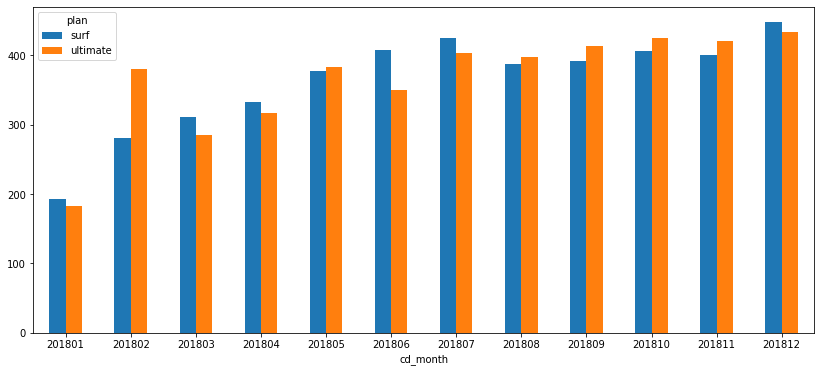

In [56]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

info_by_month = df_user_info_f.groupby(by = ['cd_month','plan']).mean()
info_by_month_unstacked = info_by_month['total_duration'].unstack()

info_by_month_unstacked.plot(kind = 'bar'
                             ,rot = 0
                             ,figsize = (14,6))

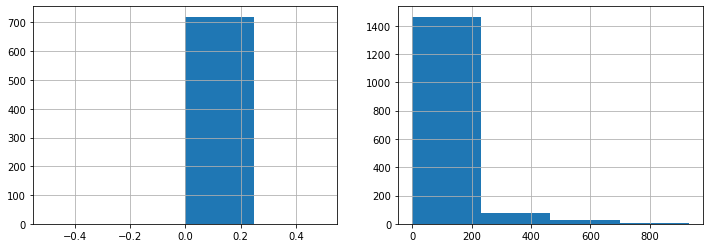

In [57]:
#Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
#Considerei aqui o número de minutos como o número de minutos comprados

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,4))

df_user_info_f[ultimate_plan]['minutes_dif'].hist(ax = axes [0],bins = 4)

df_user_info_f[surf_plan]['minutes_dif'].hist(ax = axes [1],bins = 4)

plt.show()

In [58]:
# Calcule a média e a variação da duração mensal das chamadas

#Ultimate_plan
df_user_info_f[ultimate_plan]['total_duration'].describe()

count     720.000000
mean      406.193083
std       227.246499
min         0.000000
25%       246.290000
50%       398.585000
75%       532.227500
max      1292.090000
Name: total_duration, dtype: float64

In [59]:
#surf_plan
df_user_info_f[surf_plan]['total_duration'].describe()

count    1573.000000
mean      404.762390
std       221.664397
min         0.000000
25%       255.470000
50%       401.760000
75%       543.680000
max      1431.220000
Name: total_duration, dtype: float64

### Mensagens

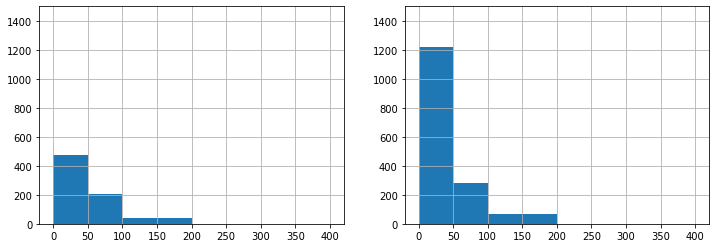

In [60]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,4))

axes[0].set_ylim(0, 1500)
axes[1].set_ylim(0, 1500)


df_user_info_f[ultimate_plan]['message_number'].hist(ax = axes [0],bins = [0,50,100,200,400])

df_user_info_f[surf_plan]['message_number'].hist(ax = axes [1],bins = [0,50,100,200,400])

plt.show()

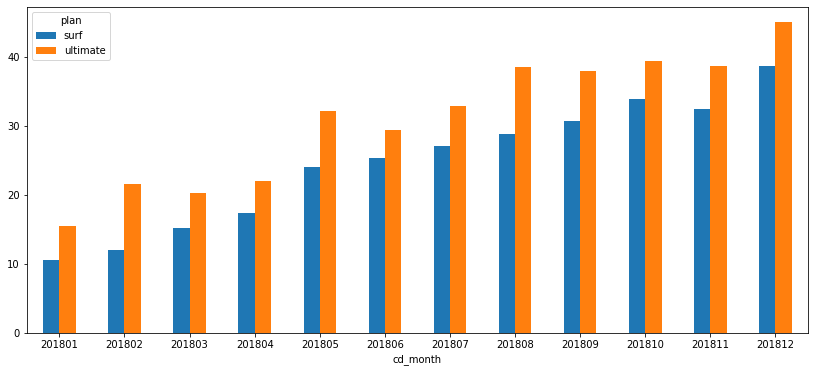

In [61]:
# Comparando a quantidade média das mensagens de cada plano para cada mês distinto

messages_by_month_unstacked = info_by_month['message_number'].unstack()

messages_by_month_unstacked.plot(kind = 'bar'
                             ,rot = 0
                             ,figsize = (14,6))

plt.show()

### Internet

In [62]:
df_user_info_f['mb_used'].describe()

count     2293.000000
mean     16764.397606
std       7967.237527
min          0.000000
25%      12235.760000
50%      16830.640000
75%      20999.840000
max      70931.590000
Name: mb_used, dtype: float64

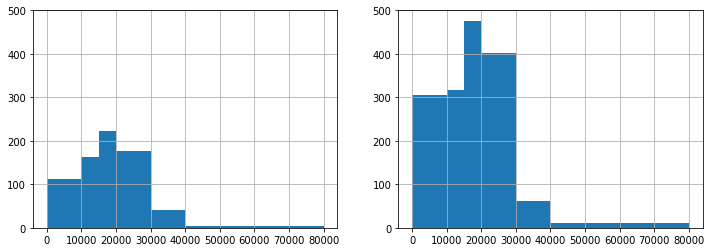

In [63]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,4))

axes[0].set_ylim(0, 500)
axes[1].set_ylim(0, 500)


df_user_info_f[ultimate_plan]['mb_used'].hist(ax = axes [0],bins = [0,10000,15000,20000,30000,40000,80000])

df_user_info_f[surf_plan]['mb_used'].hist(ax = axes [1],bins = [0,10000,15000,20000,30000,40000,80000])

plt.show()

In [64]:
print(df_user_info_f[ultimate_plan]['mb_used'].describe())
print('')
print(df_user_info_f[surf_plan]['mb_used'].describe())

count      720.000000
mean     17214.699694
std       7851.897435
min          0.000000
25%      12666.955000
50%      16858.340000
75%      21014.527500
max      46595.330000
Name: mb_used, dtype: float64

count     1573.000000
mean     16558.283490
std       8013.513327
min          0.000000
25%      11986.520000
50%      16829.310000
75%      20999.610000
max      70931.590000
Name: mb_used, dtype: float64


In [65]:
#Investigando o último quartil do plano surf

df_user_info_f[surf_plan]['mb_used'].sort_values(ascending = False).head(20)

# É possivel perrceber que ha alguns poucos valores que "puxam" a variação do último quartil

1756    70931.59
570     66863.89
1361    52034.66
1357    51809.35
1128    49950.58
1359    46868.75
933     42866.10
1130    42128.84
1964    41924.69
1132    41729.17
1288    41059.97
2075    40217.22
1364    39963.26
1276    38929.09
969     38611.72
23      37885.63
1741    37771.04
1271    37544.16
2076    37464.81
931     37298.02
Name: mb_used, dtype: float64

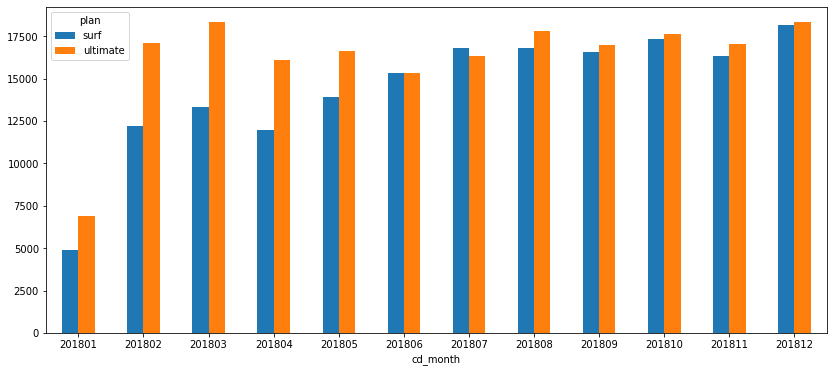

In [66]:
internet_by_month_unstacked = info_by_month['mb_used'].unstack()

internet_by_month_unstacked.plot(kind = 'bar'
                             ,rot = 0
                             ,figsize = (14,6))

plt.show()

## Receita

In [67]:
#Analisando as componentes do plano
#Receita total = usd_monthly_pay + extra_revenue_calls + extra_revenue_messages + extra_revenue_internet

df_user_info_f[ultimate_plan][['total_revenue','usd_monthly_pay','extra_revenue_calls','extra_revenue_messages','extra_revenue_internet']].describe()

,total_revenue,usd_monthly_pay,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet
count,720.000000,720.0,720.0,720.0,720.000000
mean,72.166866,70.0,0.0,0.0,2.166866
std,11.027300,0.0,0.0,0.0,11.027300
min,70.000000,70.0,0.0,0.0,0.000000
25%,70.000000,70.0,0.0,0.0,0.000000
50%,70.000000,70.0,0.0,0.0,0.000000
75%,70.000000,70.0,0.0,0.0,0.000000
max,181.127310,70.0,0.0,0.0,111.127310


In [68]:
df_user_info_f[surf_plan][['total_revenue','usd_monthly_pay','extra_revenue_calls','extra_revenue_messages','extra_revenue_internet']].describe()

,total_revenue,usd_monthly_pay,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet
count,1573.000000,1573.0,1573.000000,1573.000000,1573.000000
mean,58.148633,20.0,1.464708,0.210381,36.473543
std,55.003591,0.0,3.302048,0.584127,54.196646
min,20.000000,20.0,0.000000,0.000000,0.000000
25%,20.000000,20.0,0.000000,0.000000,0.000000
50%,36.889900,20.0,0.000000,0.000000,14.693100
75%,78.177100,20.0,1.310400,0.000000,56.396100
max,594.353100,20.0,27.936600,6.480000,555.715900


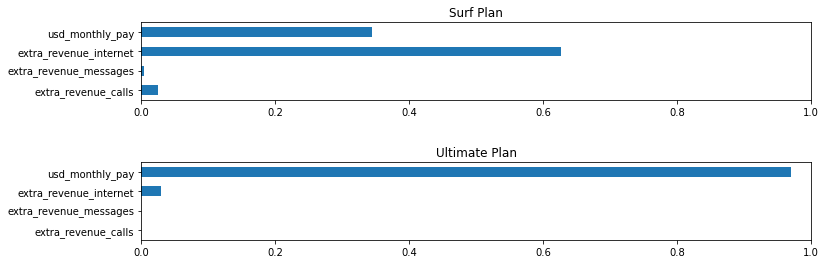

In [69]:
# Calculando as somas das receitas (sobre a receita total da categoria)

sums_revenue_surf_abs = df_user_info_f[surf_plan][['extra_revenue_calls', 'extra_revenue_messages', 'extra_revenue_internet', 'usd_monthly_pay']].sum()

sums_revenue_surf_norm = sums_revenue_surf_abs/(df_user_info_f[surf_plan]['total_revenue'].sum())

sums_revenue_ultimate_abs = df_user_info_f[ultimate_plan][['extra_revenue_calls', 'extra_revenue_messages', 'extra_revenue_internet', 'usd_monthly_pay']].sum()

sums_revenue_ultimate_norm = sums_revenue_ultimate_abs/(df_user_info_f[ultimate_plan]['total_revenue'].sum())

# Plotando os resultados

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (12,4))

# Setando o layout dos subplots

plt.subplots_adjust(hspace=0.8)

# Construindo os gráficos
sums_revenue_surf_norm.plot(kind = 'barh',title = 'Surf Plan', ax = axes[0],xlim = (0,1))

sums_revenue_ultimate_norm.plot(kind = 'barh',title = 'Ultimate Plan', ax = axes[1],xlim = (0,1))

plt.show()


In [70]:
print(f"Receita total do surf:{df_user_info_f[surf_plan]['total_revenue'].sum()}")
print('')
print(f"Receita total do ultimate:{df_user_info_f[ultimate_plan]['total_revenue'].sum()}")

Receita total do surf:91467.7993

Receita total do ultimate:51960.143200000006


## Teste hipóteses estatísticas

### Teste a hipótese de que as receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes

**Teste 1**

Assumindo que a receita_total siga uma distribuição normal podemos aplicar o teste-t para checar se 
a média da receita do plano ultimate é diferente da média do plano surf

H0 -->  média surf = média ultimate

H1 -->  média surf <> média ultimate

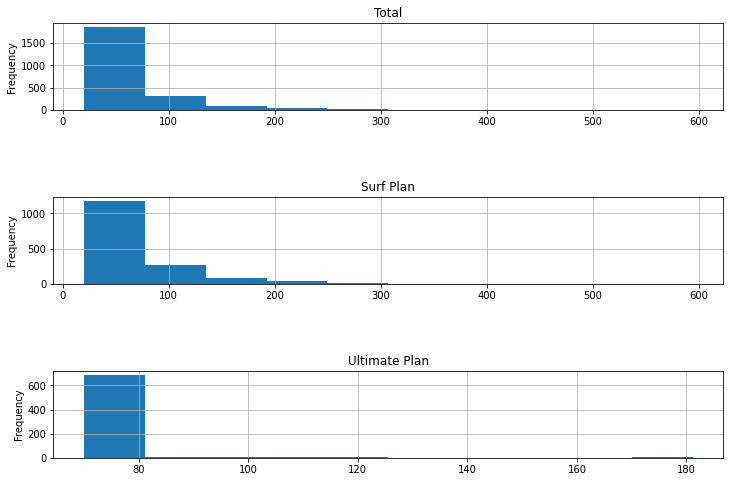

In [71]:
# Teste Levene para as variâncias

# Plotando as distribuições das colunas

#Setando os subplots

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (12,8))

plt.subplots_adjust(hspace=1)

#Construindo os gráficos

df_user_info_f['total_revenue'].plot(kind = 'hist'
                                     ,grid = True
                                     ,title = 'Total'
                                     , bins = 10
                                     ,ax = axes[0])

df_user_info_f['total_revenue'][surf_plan].plot(kind = 'hist'
                                                ,grid = True
                                                ,title = 'Surf Plan'
                                                ,bins = 10
                                                ,ax = axes[1])

df_user_info_f['total_revenue'][ultimate_plan].plot(kind = 'hist'
                                                    ,grid = True
                                                    ,title = 'Ultimate Plan'
                                                    ,bins = 10
                                                    ,ax = axes[2])
                                
plt.show()

In [72]:
# Teste Levene - O parametro median foi utilizado pela distribuição ser skewed 

levene_test1 = st.levene(df_user_info_f[surf_plan]['total_revenue']
                   ,df_user_info_f[ultimate_plan]['total_revenue']
                   ,center='median')

#Imprimindo resultados

print('alpha_levene1 = 0.05')
print(f'O p-valor é {levene_test1.pvalue}')

alpha_levene1 = 0.05
O p-valor é 8.641894322110143e-75


In [73]:
# Testando as hipóteses

alpha_test1 = 0.05 #Ou 0.5 * 10 ^-1

# O teste de Levene indicou a variância das amostras é diferente

test1 = st.ttest_ind(df_user_info_f[surf_plan]['total_revenue']
                      ,df_user_info_f[ultimate_plan]['total_revenue']
                      ,equal_var = False)

print(f'O p-valor é {test1.pvalue}')

O p-valor é 1.0782307568199576e-21


<strong>Comentário sobre o teste de hipótese</strong>

Rejeita H0, podemos dizer que as médias de faturamento dos dois planos são diferentes. O p-valor é extremamente baixo (mesmo com um alfa de 1% a hipótese nula seria rejeitada. 
    
    
Se fizessemos um teste unicaudal o resultado seria semelhante. Note que 1.07 * 10^-21 é muito menor do que 1% (que seria um valor pequeno de alfa) --> Aprox. 1 * 10^19 vezes menor.  

</div>

### Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões

Foi utilizada a área de *'NY-NJ-PA'* pois não ha um estado *'NY-NJ'*

**Teste 2**


Assumindo que a receita_total siga uma distribuição normal podemos aplicar o teste-t para checar se 
a média da receita dos usuários de 'NY-NJ-PA' é diferente da receita dos que não são desse estado.

H0 -->  média 'NY-NJ-PA' = média não 'NY-NJ-PA'

H1 -->  média 'NY-NJ-PA' <> média não 'NY-NJ-PA'

In [74]:
#Agregando os dados de state (do df de usuários) na tabela de usuários pro mês

df_user_info_f_withstate = df_user_info_f.merge(df_users_treated[['user_id','state']]
                                               ,on = ['user_id']
                                               ,how = 'left')

df_user_info_f_withstate

,user_id,cd_month,plan,usd_monthly_pay,call_number_count,total_duration,minutes_included,usd_per_minute,message_number,messages_included,...,mb_per_month_included,usd_per_gb,minutes_dif,messages_dif,internet_dif_gb,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet,total_revenue,state
0,1000,201812,ultimate,70,16.0,116.83,3000,0.01,11.0,1000,...,30720,7,0.0,0.0,0.00000,0.0,0.00,0.0000,70.0000,GA
1,1001,201808,surf,20,27.0,171.14,500,0.03,30.0,50,...,15360,10,0.0,0.0,0.00000,0.0,0.00,0.0000,20.0000,WA
2,1001,201809,surf,20,49.0,297.69,500,0.03,44.0,50,...,15360,10,0.0,0.0,0.00000,0.0,0.00,0.0000,20.0000,WA
3,1001,201810,surf,20,65.0,374.11,500,0.03,53.0,50,...,15360,10,0.0,3.0,6.97049,0.0,0.09,69.7049,89.7949,WA
4,1001,201811,surf,20,64.0,404.59,500,0.03,36.0,50,...,15360,10,0.0,0.0,3.14430,0.0,0.00,31.4430,51.4430,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,201812,surf,20,39.0,324.77,500,0.03,0.0,50,...,15360,10,0.0,0.0,7.77769,0.0,0.00,77.7769,97.7769,NY-NJ-PA
2289,1499,201809,surf,20,41.0,330.37,500,0.03,0.0,50,...,15360,10,0.0,0.0,0.00000,0.0,0.00,0.0000,20.0000,FL
2290,1499,201810,surf,20,53.0,363.28,500,0.03,0.0,50,...,15360,10,0.0,0.0,4.13243,0.0,0.00,41.3243,61.3243,FL
2291,1499,201811,surf,20,45.0,288.56,500,0.03,0.0,50,...,15360,10,0.0,0.0,1.45383,0.0,0.00,14.5383,34.5383,FL


In [75]:
#Salvando os filtros --> O teste será feito em cima desses filtros

sample_ny_nj_pa = df_user_info_f_withstate['state'] == 'NY-NJ-PA'

sample_not_ny_nj_pa = df_user_info_f_withstate['state'] != 'NY-NJ-PA'

In [76]:
#Imprimindo as descritivas para as duas amostras

print(df_user_info_f_withstate[sample_ny_nj_pa]['total_revenue'].describe())
print('')
df_user_info_f_withstate[sample_not_ny_nj_pa]['total_revenue'].describe()

count    377.000000
mean      57.849406
std       43.081898
min       20.000000
25%       20.000000
50%       49.304300
75%       71.027400
max      285.646900
Name: total_revenue, dtype: float64



count    1916.000000
mean       63.475322
std        47.012957
min        20.000000
25%        22.955900
50%        70.000000
75%        70.000000
max       594.353100
Name: total_revenue, dtype: float64

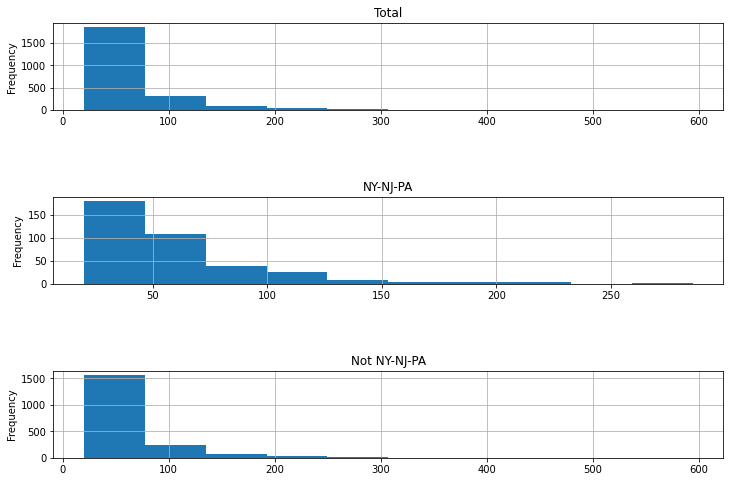

In [77]:
# Teste Levene para as variâncias

# Plotando as distribuições das colunas

#Setando os subplots

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (12,8))

plt.subplots_adjust(hspace=1)

#Construindo os gráficos

df_user_info_f['total_revenue'].plot(kind = 'hist'
                                     ,grid = True
                                     ,title = 'Total'
                                     , bins = 10
                                     ,ax = axes[0])

df_user_info_f['total_revenue'][sample_ny_nj_pa].plot(kind = 'hist'
                                                ,grid = True
                                                ,title = 'NY-NJ-PA'
                                                ,bins = 10
                                                ,ax = axes[1])

df_user_info_f['total_revenue'][sample_not_ny_nj_pa].plot(kind = 'hist'
                                                    ,grid = True
                                                    ,title = 'Not NY-NJ-PA'
                                                    ,bins = 10
                                                    ,ax = axes[2])
                                
plt.show()

In [78]:
# Teste Levene - O parametro median foi utilizado pela distribuição ser skewed

levene_test2 = st.levene(df_user_info_f[sample_ny_nj_pa]['total_revenue']
                   ,df_user_info_f[sample_not_ny_nj_pa]['total_revenue']
                   ,center='median')

#Imprimindo resultados
print('alpha_levene2 = 0.05')
print(f'O p-valor é {levene_test2.pvalue}')

alpha_levene2 = 0.05
O p-valor é 0.23296258961411606


In [79]:
# Testando as hipóteses

alpha_test2 = 0.05 #Ou 0.5 * 10 ^-1

# O teste de Levene indicou a variância das amostras é igual

test2 = st.ttest_ind(df_user_info_f_withstate[sample_ny_nj_pa]['total_revenue']
                      ,df_user_info_f_withstate[sample_not_ny_nj_pa]['total_revenue']
                      ,equal_var = True)

print(f'O p-valor é {test2.pvalue}')

O p-valor é 0.03146757549710085


<strong>Comentário do estudante v0</strong>

Rejeita H0, podemos dizer que as médias de faturamento para os dois grupos de usuários são diferentes.
    
É importante destacar que o p-valor foi de 3.1%. Nós iremos rejeitar H0 e assumir que as médias são diferentes, porém vale destacar que esse teste deu resultados mais incertos do que o primeiro teste.
    
Um p_valor de 0.03 não deveria ser tratado igual a um p-valor de 1*10^-21 (apesar de ambos os testes chegarem na mesma conclusão). O argumento da rejeição de H0 é muito mais forte quando o p_valor é extremamente pequeno. 
</div>

## Conclusão geral

O plano ultimate é mais rentável que o plano surf. Porém dependendo da estratégia que a companhia quer seguir pode ser que valha mais a pena investir em um (ou no outro)
    
O principal ponto de diferença entre os dois é que o plano ultimate tem uma receita mais estável, pois grande parte do que se ganha vem através de assinaturas, ao passo que o plano surf tem uma receita menos estável e que depende mais da venda dos serviços avulsos.
    
</div>